In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

In [2]:
df_2017 = pd.read_csv('data/subway_time/subway_time_2017.csv', encoding='cp949')
df_2018 = pd.read_csv('data/subway_time/subway_time_2018.csv', encoding='cp949')
df_2019 = pd.read_csv('data/subway_time/subway_time_2019.csv', encoding='cp949')
df_2020 = pd.read_csv('data/subway_time/subway_time_2020.csv', encoding='cp949')
df_2021 = pd.read_csv('data/subway_time/subway_time_2021.csv', encoding='cp949')
df_2022_08 = pd.read_csv('data/subway_time/subway_time_2022.csv', encoding='cp949')

In [3]:
station_loc = pd.read_csv('data/subway_time/지하철역_좌표.csv', encoding='cp949')

# 특정 날짜 특정 장소 연도별 시간대별 그래프 그리기

## 2017~2021 10-31 이태원 하차인원

In [4]:
target_date = '-10-31'
target_sta = '이태원'

In [5]:
df_plot2017 = df_2017[(df_2017['역명'] == target_sta) & (df_2017['날짜'] == ('2017' + target_date))]
df_plot2018 = df_2018[(df_2018['역명'] == target_sta) & (df_2018['날짜'] == ('2018' + target_date))]
df_plot2019 = df_2019[(df_2019['역명'] == target_sta) & (df_2019['날짜'] == ('2019' + target_date))]
df_plot2020 = df_2020[(df_2020['역명'] == target_sta) & (df_2020['날짜'] == ('2020' + target_date))]
df_plot2021 = df_2021[(df_2021['역명'] == target_sta) & (df_2021['날짜'] == ('2021' + target_date))]

In [6]:
df_plot2017 = df_plot2017.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2018 = df_plot2018.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2019 = df_plot2019.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2020 = df_plot2020.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2021 = df_plot2021.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])

Text(0.5, 1.0, '할로윈 이태원역 하차인원')

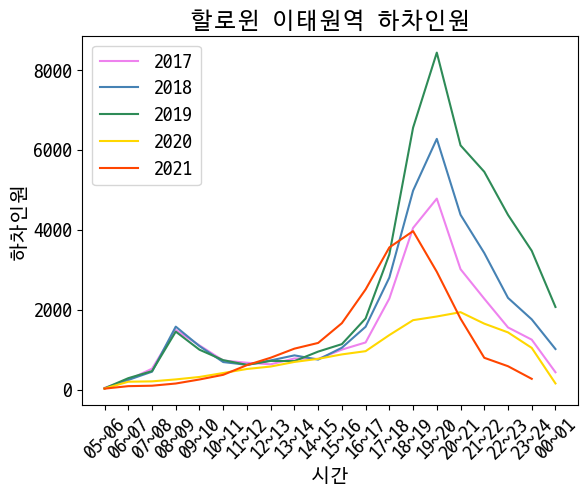

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=df_plot2017, x='시간', y='하차인원', label='2017', color='violet')
sns.lineplot(data=df_plot2018, x='시간', y='하차인원', label='2018', color='steelblue')
sns.lineplot(data=df_plot2019, x='시간', y='하차인원', label='2019', color='seagreen')
sns.lineplot(data=df_plot2020, x='시간', y='하차인원', label='2020', color='gold')
sns.lineplot(data=df_plot2021, x='시간', y='하차인원', label='2021', color='orangered')
plt.xticks(rotation=45)
plt.title("할로윈 이태원역 하차인원")

# 특정 날짜 시간대 서울 전체 heatmap

## 2019-10-31 18시~01시 서울 전체 유동인구

In [8]:
# columns = '날짜', '역명', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
#       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
#       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01'

In [9]:
target_date = '2019-10-31'

In [10]:
heat2019 = df_2019[df_2019['날짜'] == target_date]

In [11]:
heat2019 = heat2019[['날짜', '역명']]

In [12]:
heat2019['계'] = df_2019[['18~19', '19~20', '20~21', '21~22', '22~23', '23~24', '00~01']].sum(axis=1)

In [13]:
heat2019 = heat2019.merge(station_loc, how='left', on='역명')

In [14]:
seoul_loc = (37.566535, 126.9779692)
seoul = folium.Map(seoul_loc, zoom_start=12, tiles='Stamen Terrain')
seoul.add_child(plugins.HeatMap(zip(heat2019['y'], heat2019['x'], heat2019['계']), radius=20))

In [15]:
# seoul.save('2019_10_31_map.html')

# 크리스마스 이브

## 2017 17시~24시

In [16]:
df_2017_xmas = df_2017[df_2017['날짜'] == '2017-12-24']

In [17]:
df_2017_xmas['계'] = df_2017_xmas[['17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24']].sum(axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_10184\1537710058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_xmas['계'] = df_2017_xmas[['17~18', '18~19',


In [18]:
df_2017_xmas.sort_values(by='계', ascending=False, inplace=True)
df_2017_xmas.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_10184\1982616134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_xmas.sort_values(by='계', ascending=False, inplace=True)


,날짜,역명,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,계
98223,2017-12-24,홍대입구,110,524,500,683,1873,3180,4798,7263,...,9522,10014,9290,8260,6867,5401,4855,3927,905,48614
98214,2017-12-24,신림,215,723,609,796,1230,1680,2161,2139,...,3341,4249,4646,4048,3706,4495,4411,3751,400,29306
98200,2017-12-24,잠실(송파구청),174,900,1009,1969,3856,4009,5825,6757,...,8946,7109,5809,4175,2839,2974,2663,1772,369,27341
98206,2017-12-24,강남,112,673,728,1184,2410,2905,3509,4236,...,5387,5658,4986,4406,3370,3590,2623,1870,72,26503
98283,2017-12-24,명동,44,430,664,1114,1737,2385,3514,4107,...,5816,5995,5617,4637,3542,2469,1442,748,102,24450


In [43]:
tmp = df_2017_xmas[['역명', '계']].head(5)
tmp.columns = ['역명', '하차총인원수']
tmp

,역명,하차총인원수
98223,홍대입구,48614
98214,신림,29306
98200,잠실(송파구청),27341
98206,강남,26503
98283,명동,24450


In [19]:
df_2017_xmas_heat = df_2017_xmas.merge(station_loc, how='left', on='역명')

In [20]:
seoul_loc = (37.566535, 126.9779692)
seoul = folium.Map(seoul_loc, zoom_start=12, tiles='Stamen Terrain')
seoul.add_child(plugins.HeatMap(zip(df_2017_xmas_heat['y'], df_2017_xmas_heat['x'], df_2017_xmas_heat['계']), radius=20))

In [21]:
seoul.save('data/christmas/2017_heatmap.html')

## 2018 17시~24시

In [22]:
df_2018_xmas = df_2018[df_2018['날짜'] == '2018-12-24']

df_2018_xmas['계'] = df_2018_xmas[['17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24']].sum(axis=1)

df_2018_xmas.sort_values(by='계', ascending=False, inplace=True)

df_2018_xmas_heat = df_2018_xmas.merge(station_loc, how='left', on='역명')

C:\Users\user\AppData\Local\Temp\ipykernel_10184\1477125412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_xmas['계'] = df_2018_xmas[['17~18', '18~19',
C:\Users\user\AppData\Local\Temp\ipykernel_10184\1477125412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_xmas.sort_values(by='계', ascending=False, inplace=True)


In [23]:
seoul_loc = (37.566535, 126.9779692)
seoul = folium.Map(seoul_loc, zoom_start=12, tiles='Stamen Terrain')
seoul.add_child(plugins.HeatMap(zip(df_2018_xmas_heat['y'], df_2018_xmas_heat['x'], df_2018_xmas_heat['계']), radius=20))

In [24]:
seoul.save('data/christmas/2018_heatmap.html')

## 2019 17시~24시

In [25]:
df_2019_xmas = df_2019[df_2019['날짜'] == '2019-12-24']

df_2019_xmas['계'] = df_2019_xmas[['17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24']].sum(axis=1)

df_2019_xmas.sort_values(by='계', ascending=False, inplace=True)

df_2019_xmas_heat = df_2019_xmas.merge(station_loc, how='left', on='역명')

C:\Users\user\AppData\Local\Temp\ipykernel_10184\1450265859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_xmas['계'] = df_2019_xmas[['17~18', '18~19',
C:\Users\user\AppData\Local\Temp\ipykernel_10184\1450265859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_xmas.sort_values(by='계', ascending=False, inplace=True)


In [26]:
seoul_loc = (37.566535, 126.9779692)
seoul = folium.Map(seoul_loc, zoom_start=12, tiles='Stamen Terrain')
seoul.add_child(plugins.HeatMap(zip(df_2019_xmas_heat['y'], df_2019_xmas_heat['x'], df_2019_xmas_heat['계']), radius=20))

In [27]:
seoul.save('data/christmas/2019_heatmap.html')

## 2020 17시~24시

In [28]:
df_2020_xmas = df_2020[df_2020['날짜'] == '2020-12-24']

df_2020_xmas['계'] = df_2020_xmas[['17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24']].sum(axis=1)

df_2020_xmas.sort_values(by='계', ascending=False, inplace=True)

df_2020_xmas_heat = df_2020_xmas.merge(station_loc, how='left', on='역명')

C:\Users\user\AppData\Local\Temp\ipykernel_10184\1613890092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_xmas['계'] = df_2020_xmas[['17~18', '18~19',
C:\Users\user\AppData\Local\Temp\ipykernel_10184\1613890092.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_xmas.sort_values(by='계', ascending=False, inplace=True)


In [29]:
df_2020_xmas_heat[df_2020_xmas_heat['y'].isnull()]

,날짜,역명,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,18~19,19~20,20~21,21~22,22~23,23~24,00~01,계,y,x
51,2020-12-24,미사,0,254,254,555,376,280,254,262,...,2095,1640,1065,633,420,159,38,6879,NaN,NaN


In [30]:
df_2020_xmas_heat.dropna(axis=0, inplace=True)

In [31]:
seoul_loc = (37.566535, 126.9779692)
seoul = folium.Map(seoul_loc, zoom_start=12, tiles='Stamen Terrain')
seoul.add_child(plugins.HeatMap(zip(df_2020_xmas_heat['y'], df_2020_xmas_heat['x'], df_2020_xmas_heat['계']), radius=20))

In [32]:
seoul.save('data/christmas/2020_heatmap.html')

## 2021 17시~24시

In [33]:
df_2021_xmas = df_2021[df_2021['날짜'] == '2021-12-24']

df_2021_xmas['계'] = df_2021_xmas[['17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24']].sum(axis=1)

df_2021_xmas.sort_values(by='계', ascending=False, inplace=True)
df_2021_xmas.head(5)

df_2021_xmas_heat = df_2021_xmas.merge(station_loc, how='left', on='역명')

C:\Users\user\AppData\Local\Temp\ipykernel_10184\1383955924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_xmas['계'] = df_2021_xmas[['17~18', '18~19',
C:\Users\user\AppData\Local\Temp\ipykernel_10184\1383955924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_xmas.sort_values(by='계', ascending=False, inplace=True)


In [42]:
tmp = df_2021_xmas[['역명', '계']].head(5)
tmp.columns = ['역명', '하차총인원수']
tmp

,역명,하차총인원수
99973,신림,38961
99959,잠실(송파구청),32213
99971,서울대입구(관악구청),25628
99982,홍대입구,25199
99975,구로디지털단지,24580


In [34]:
df_2021_xmas_heat[df_2021_xmas_heat['y'].isnull()]

,날짜,역명,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,계,y,x
45,2021-12-24,미사,36,280,402,845,589,416,481,510,...,1445,2671,2200,964,625,1105,345,9355,NaN,NaN
196,2021-12-24,하남시청(덕풍·신장),9,92,157,410,251,243,220,323,...,493,864,608,398,266,415,131,3175,NaN,NaN
228,2021-12-24,하남검단산,1,72,165,338,245,231,241,298,...,453,604,541,335,196,322,121,2572,NaN,NaN
244,2021-12-24,강일,13,87,145,219,78,81,93,131,...,348,553,436,246,213,140,90,2026,NaN,NaN
249,2021-12-24,남위례,13,42,106,379,162,94,117,172,...,407,528,394,178,238,149,52,1946,NaN,NaN


In [35]:
df_2021_xmas_heat.dropna(axis=0, inplace=True)

In [36]:
seoul_loc = (37.566535, 126.9779692)
seoul = folium.Map(seoul_loc, zoom_start=12, tiles='Stamen Terrain')
seoul.add_child(plugins.HeatMap(zip(df_2021_xmas_heat['y'], df_2021_xmas_heat['x'], df_2021_xmas_heat['계']), radius=20))

In [37]:
seoul.save('data/christmas/2021_heatmap.html')

## 홍대입구 선그래프

In [52]:
target_date = '-12-24'
target_sta = '홍대입구'

In [53]:
df_plot2017 = df_2017[(df_2017['역명'] == target_sta) & (df_2017['날짜'] == ('2017' + target_date))]
df_plot2018 = df_2018[(df_2018['역명'] == target_sta) & (df_2018['날짜'] == ('2018' + target_date))]
df_plot2019 = df_2019[(df_2019['역명'] == target_sta) & (df_2019['날짜'] == ('2019' + target_date))]
df_plot2020 = df_2020[(df_2020['역명'] == target_sta) & (df_2020['날짜'] == ('2020' + target_date))]
df_plot2021 = df_2021[(df_2021['역명'] == target_sta) & (df_2021['날짜'] == ('2021' + target_date))]

In [54]:
df_plot2017 = df_plot2017.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2018 = df_plot2018.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2019 = df_plot2019.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2020 = df_plot2020.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2021 = df_plot2021.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])

Text(0.5, 1.0, '크리스마스 이브 홍대입구역 하차인원')

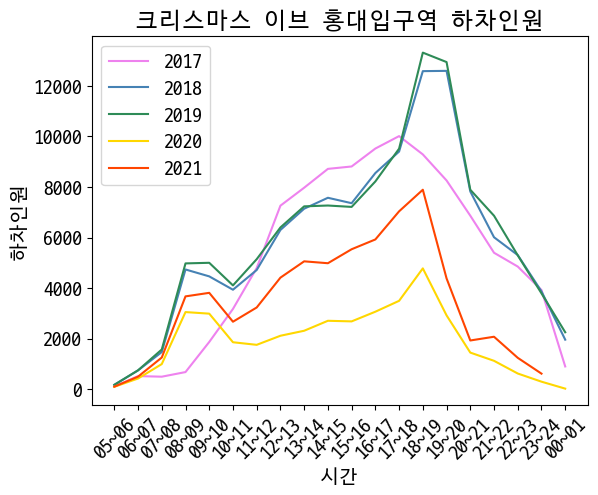

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=df_plot2017, x='시간', y='하차인원', label='2017', color='violet')
sns.lineplot(data=df_plot2018, x='시간', y='하차인원', label='2018', color='steelblue')
sns.lineplot(data=df_plot2019, x='시간', y='하차인원', label='2019', color='seagreen')
sns.lineplot(data=df_plot2020, x='시간', y='하차인원', label='2020', color='gold')
sns.lineplot(data=df_plot2021, x='시간', y='하차인원', label='2021', color='orangered')
plt.xticks(rotation=45)
plt.title("크리스마스 이브 홍대입구역 하차인원")

## 신림 선그래프

In [48]:
target_date = '-12-24'
target_sta = '신림'

In [49]:
df_plot2017 = df_2017[(df_2017['역명'] == target_sta) & (df_2017['날짜'] == ('2017' + target_date))]
df_plot2018 = df_2018[(df_2018['역명'] == target_sta) & (df_2018['날짜'] == ('2018' + target_date))]
df_plot2019 = df_2019[(df_2019['역명'] == target_sta) & (df_2019['날짜'] == ('2019' + target_date))]
df_plot2020 = df_2020[(df_2020['역명'] == target_sta) & (df_2020['날짜'] == ('2020' + target_date))]
df_plot2021 = df_2021[(df_2021['역명'] == target_sta) & (df_2021['날짜'] == ('2021' + target_date))]

In [50]:
df_plot2017 = df_plot2017.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2018 = df_plot2018.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2019 = df_plot2019.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2020 = df_plot2020.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])
df_plot2021 = df_plot2021.melt(id_vars=['날짜', '역명'], var_name='시간', value_name='하차인원').drop(columns=['날짜', '역명'])

Text(0.5, 1.0, '크리스마스 이브 신림역 하차인원')

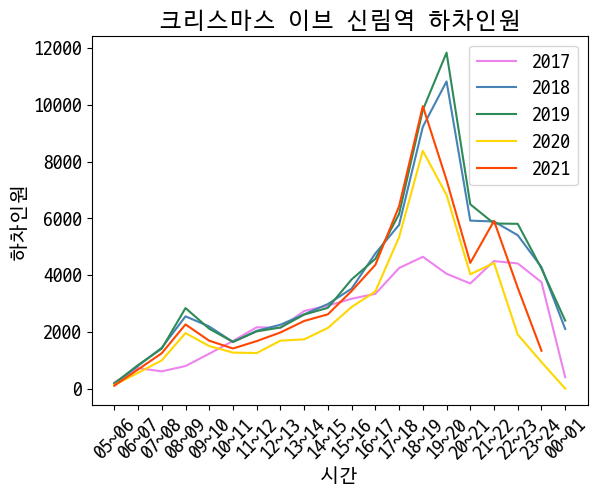

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=df_plot2017, x='시간', y='하차인원', label='2017', color='violet')
sns.lineplot(data=df_plot2018, x='시간', y='하차인원', label='2018', color='steelblue')
sns.lineplot(data=df_plot2019, x='시간', y='하차인원', label='2019', color='seagreen')
sns.lineplot(data=df_plot2020, x='시간', y='하차인원', label='2020', color='gold')
sns.lineplot(data=df_plot2021, x='시간', y='하차인원', label='2021', color='orangered')
plt.xticks(rotation=45)
plt.title("크리스마스 이브 신림역 하차인원")